## Interview Task

1. Using the dataset from https://www.kaggle.com/blastchar/telco-customer-churn, model the user churn and what are the factors contributing to it. Given these data, what are the recommendations you would make to reduce/prevent user churn, either static (based on the current data) or dynamic (triggered by certain factors, for example if a specific customer persona performs an action indicating he's likely to churn so an email should be sent to offer them a discount). You can address the marketing team, pricing, anything that you think could be useful to reduce churn based on whatever data-driven insights you can gain from the dataset.


2. Using the yellow taxi trip records from the homework (https://www1.nyc.gov/site/tlc/about/tlc-trip-recorddata. page), prepare a dashboard for the CEO and the board of one of the taxi vendors, highlighting the most important business metrics of September 2018. You can use data from other months of 2018 if they aid you in conveying the message.This dashboard should allow their users to quickly get the information they need to understand the state of business and which improvements need to be made. You can generate the plots (if not done during the homework) using your favourite library and then simply paste
them in a presentation to explain how they would be organized, the kind of drill downs that would be offered, etc.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Telco-Customer-Churn.csv", header = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First observation: No Missing values 

Second observation: Need to convert attributes to categorical/numeric

In [ ]:
df = data   # take a copy of the original data set
df['gender'] = pd.Categorical(df.gender)
df['SeniorCitizen'] = pd.Categorical(df.SeniorCitizen)
df['Partner'] = pd.Categorical(df.Partner)
df['Dependents'] = pd.Categorical(df.Dependents)
df['PhoneService'] = pd.Categorical(df.PhoneService)
df['MultipleLines'] = pd.Categorical(df.MultipleLines)
df['InternetService'] = pd.Categorical(df.InternetService)
df['OnlineSecurity'] = pd.Categorical(df.OnlineSecurity)
df['OnlineBackup'] = pd.Categorical(df.OnlineBackup)
df['DeviceProtection'] = pd.Categorical(df.DeviceProtection)
df['TechSupport'] = pd.Categorical(df.TechSupport)
df['StreamingTV'] = pd.Categorical(df.StreamingTV)
df['StreamingMovies'] = pd.Categorical(df.StreamingMovies)
df['Contract'] = pd.Categorical(df.Contract)
df['PaperlessBilling'] = pd.Categorical(df.PaperlessBilling)
df['PaymentMethod'] = pd.Categorical(df.PaymentMethod) 
df['Churn'] = pd.Categorical(df.Churn)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

Data Types look good

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Explore Churn

In [ ]:
notChurn = df[df['Churn'] == "No"]   # just to compare populations

churn = df[df['Churn'] == "Yes"]
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
churn.shape[0]

1869

In [ ]:
notChurn.shape[0]

5174

Text(0.5, 1.0, 'NOT_Churn')

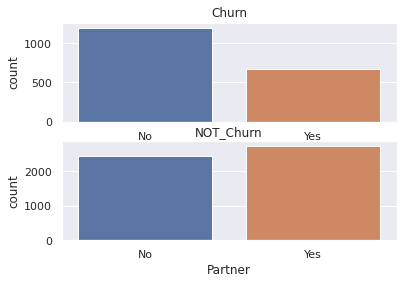

In [ ]:
sns.set_theme(style="darkgrid")

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = churn, x = 'Partner', ax = ax1).set_title("Churn")

ax2 = fig.add_subplot(2,1,2) 
sns.countplot(data = notChurn, x = 'Partner', ax = ax2).set_title("NOT_Churn")

got some help from Stack Overflow to add percentages on top of the countplot
https://stackoverflow.com/questions/63603222/adding-percentages-to-sns-countplot-how-do-i-show-percentages-for-two-values-w


In [ ]:
def create_countplot(var):
  fig = plt.figure()

  ax1 = fig.add_subplot(2,1,1) 
  sns.countplot(data = churn, x = var, ax = ax1).set_title("Churn")

  total_1 = churn.shape[0]
  for p in ax1.patches:
      percentage = f'{100 * p.get_height() / total_1:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax1.annotate(percentage, (x, y), ha='center', va='center')
  plt.tight_layout()

  ax2 = fig.add_subplot(2,1,2) 
  sns.countplot(data = notChurn, x = var, ax = ax2).set_title("NOT_Churn")

  total_2 = notChurn.shape[0]
  for p in ax2.patches:
      percentage = f'{100 * p.get_height() / total_2:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax2.annotate(percentage, (x, y), ha='center', va='center')
  plt.tight_layout()
  plt.show()

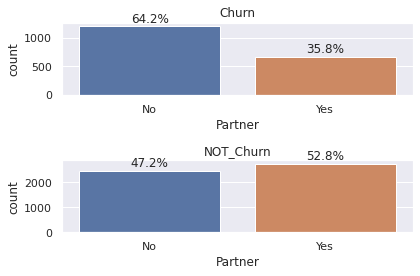

In [ ]:
create_countplot('Partner')

There is a somewhat of a significant difference in the population here:

* Most people with Churn do not have a partner, while the opposite is true for the NOT_CHURN population

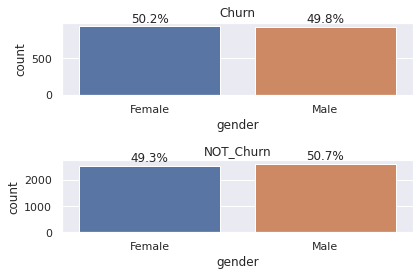

In [ ]:
create_countplot('gender')

As I thought so, gender seems to have nothing to do with Churn. Good. We don't want biased data.

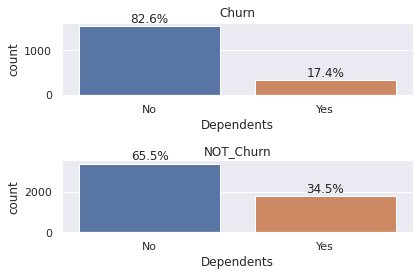

In [ ]:
create_countplot('Dependents')

This is interesting: 

*   More people don't have dependents in the Churn population (82.6% vs. 65.5%)



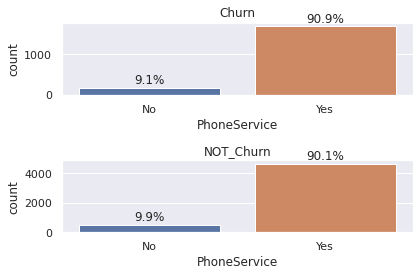

In [ ]:
create_countplot('PhoneService')

Phone Service seems to have nothing to do with Churn

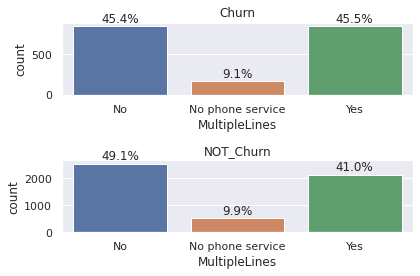

In [ ]:
create_countplot('MultipleLines')

The distribution between the two populations seems to be pretty close, so I will go ahead and assume that Multiple Lines does not play a significant role in determining Churn

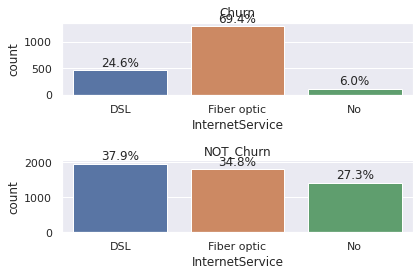

In [ ]:
create_countplot('InternetService')

Pretty big difference in the 2 distributions. This is worth flagging, and further exploring

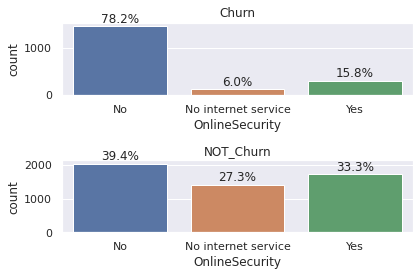

In [ ]:
create_countplot('OnlineSecurity')

There is a somewhat large difference in these 2 distributions. This too is worth flagging, and further exploring

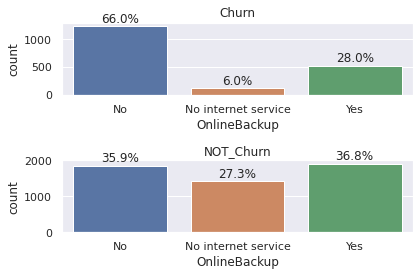

In [ ]:
create_countplot('OnlineBackup')

Closely the same distribution to OnlineSecurity ... who knows, these two might be related (dependency?)

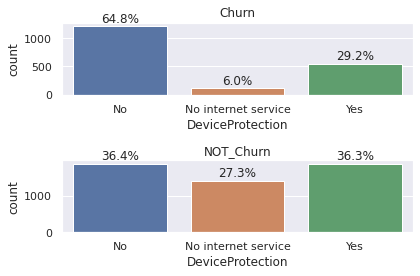

In [ ]:
create_countplot('DeviceProtection')

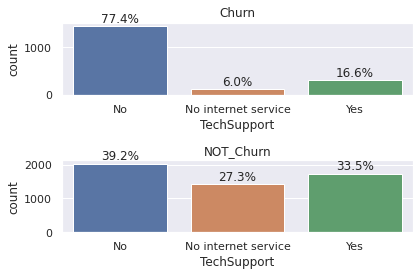

In [ ]:
create_countplot('TechSupport')

A lot more people who leave do not have tech Support 



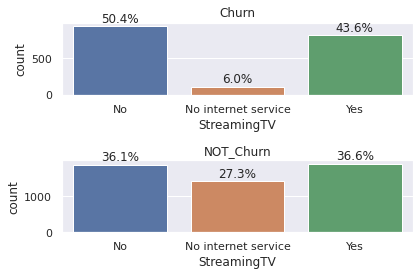

In [ ]:
create_countplot('StreamingTV')

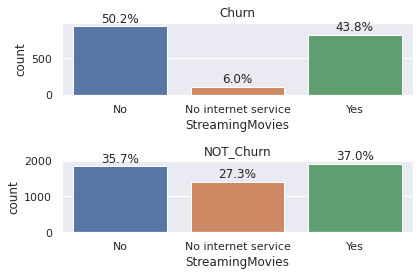

In [ ]:
create_countplot('StreamingMovies')

Streaming Movies and Streaming TV pretty much have the same distribution

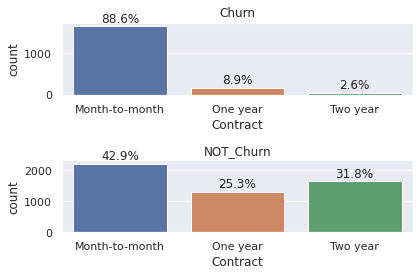

In [ ]:
create_countplot('Contract')

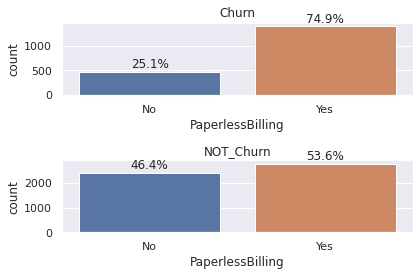

In [ ]:
create_countplot('PaperlessBilling')

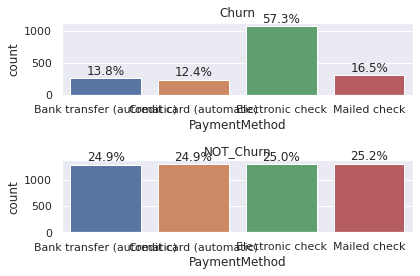

In [ ]:
create_countplot('PaymentMethod')

Quite a big difference between the 2 populations here too. Electronic checks seems to be the key difference.

In [ ]:
def create_histogram(var):
  fig = plt.figure()

  ax1 = fig.add_subplot(2,1,1) 
  sns.histplot(data = churn, x = var, ax = ax1).set_title("Churn")

  ax2 = fig.add_subplot(2,1,2)
  sns.histplot(data = notChurn, x = var, ax = ax2).set_title("NOT_Churn") 

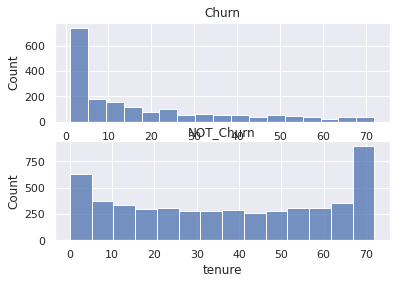

In [ ]:
create_histogram('tenure')

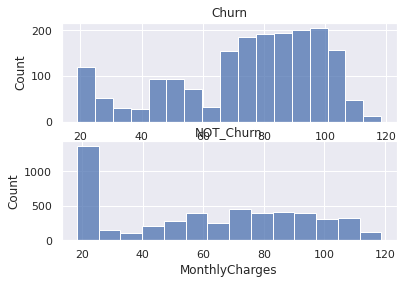

In [ ]:
create_histogram('MonthlyCharges')

From the Monthly Charges I can see that the control group was spending a lot less money each month

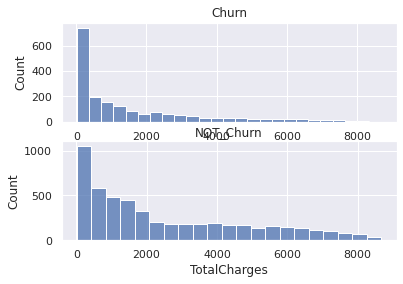

In [ ]:
create_histogram('TotalCharges')

In [ ]:
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [ ]:
notChurn.describe()

,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5163.000000
mean,37.569965,61.265124,2555.344141
std,24.113777,31.092648,2329.456984
min,0.000000,18.250000,18.800000
25%,15.000000,25.100000,577.825000
50%,38.000000,64.425000,1683.600000
75%,61.000000,88.400000,4264.125000
max,72.000000,118.750000,8672.450000


**Population Numerical Summary:**

CHURN:

*   AVG_tenure: **18 months** (w/ st. dev = 19.5 months)
*   AVG_monthly_charge:  **74.44** (w/ st. dev = 24.66)
*   AVG_total_charge:  **1531.80** (w/ st. dev = 1890.82)



NOT_CHURN:

*   AVG_tenure: **37.6 months** (w/ st. dev =  24.11 months)
*   AVG_monthly_charge:  **61.30** (w/ st. dev = 31.09)
*   AVG_total_charge:  **2555.34** (w/ st. dev = 2329.45)


# SUMMARY

Okay, let's try to summarize all the differences between the two populations:

1.   InternetService: **Close to 70% of the people who left have Fiber Optic, while the control group had only 34.8% Fiber Optic, and 47.9% DSL**
2.   Partner: More people who left have no partner than the control group
3.   Dependents: More people who left have no children than the control group
4.   Online Security and Online Backup: **A larger chunk of the customers who left did not have Online security and/or online backup**
5.   Device Protection: **most people who left did not have device protection**
6.   Tech Support: **a lot more people who left did not have Tech Support**
7.   Streaming Movies and Streaming TV: A larger chunk of the control group did not have any internet service, so no streaming for them, but the group who left had more internet service, thus this points an arrow to the Internet Service issues
8.   Contract: **Close to 90% of the people who left were on month-to-month, while the majority of the control group had 1 year or 2 year deals**
9.   Payment method: **People who left used way more Electronic checks than the control group**
10.  PaperlessBilling: A lot more people were on paperless billing than the control group




#Recommendations:

1. Data suggests that there might be something wrong with the Fiber Optics internet Service. It's probably either too expensive, or it does not work too well, or maybe both, but my suggestion for the company is to take a close look at the users who have fiber optics, and try to gt them to do a survey to identify their satisfaction levels. Based on the results of the survey decide what to change about the Fiber Optics service


2. Based on the satisfaction scores from the survey I recommend the following:


*   If customer is unsatisfied because of the price, offer them a discount to have them stay
*   Or if the customer is unsatisfied about the quality of the fiber optics service, recommend them to switch over to DSL, and maybe even offer them an incentive of 1-2 free months 


3. A larger chunk of the customers who left did not have Online security and/or online backup. Consider offering these two services initially at a low cost, as they are most likely already paying more than the control group (most likely due to their very expensive fiber optics internet service

4. A large size of the customer pool who decided to leave did not have Tech Support services. Maybe they were frustated with some of the services, or technical glitches, and they did not want to pay someone to fix it, so they left. MAYBE. More investigation is needed here. However, I would recommend offering at least 1 or 2 free techical support sessions for customers who have difficulties using newly purchased subscriptions.

5. This is a HEAVY one: Close to 90% of the customers who left were on month-to-month contract, while the majority of the control group had 1 year or 2 year deals, however, the from the monthly charges we can see that on average the control group was spending less money on their services than the churn group. This suggests that in order to keep customers from leaving it would be advised to lock them down on a 1 or 2 year deal .. but this could only happen if we can show them that it will not cost them more money to be tied down for a longer period of time, while also making sure that the company still makes profit

6. Customers who left used way more Electronic checks than the control group. Investisticate via the customer satisfaction survey if this had anything to do with their unsatisfaction. If yes, then offer to convert them to a different payment method for free.





# Modeling

In [ ]:
df.columns.values.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

to_include = ['InternetService', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'DeviceProtection',
              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges']
X = df[to_include]
y = df['Churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
logit = LogisticRegression(random_state=42).fit(X_train, y_train)

y_predicted = logit.predict(X_test)

f1_score(y_test, y_predicted)

ValueError: ignored

In [ ]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

prep = preprocessing.LabelEncoder()
prep.fit(df["Partner"].astype(str))
list(prep.classes_)

['No', 'Yes']